👤 Profile: tourist
🏅 Rating: 3777
📈 Max Rating: 4009
🎖 Rank: legendary grandmaster
💬 Contribution: 108

📄 Total submissions: 100
✅ Accepted: 75


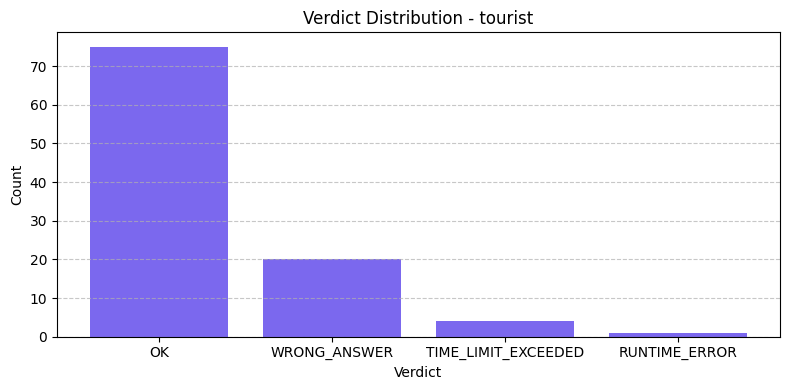

C:\Users\Hemanth Singh\AppData\Local\Temp\ipykernel_23108\2276481801.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Hemanth Singh\OneDrive\Desktop\LeetcodeCodeforces Profile Analyzer\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


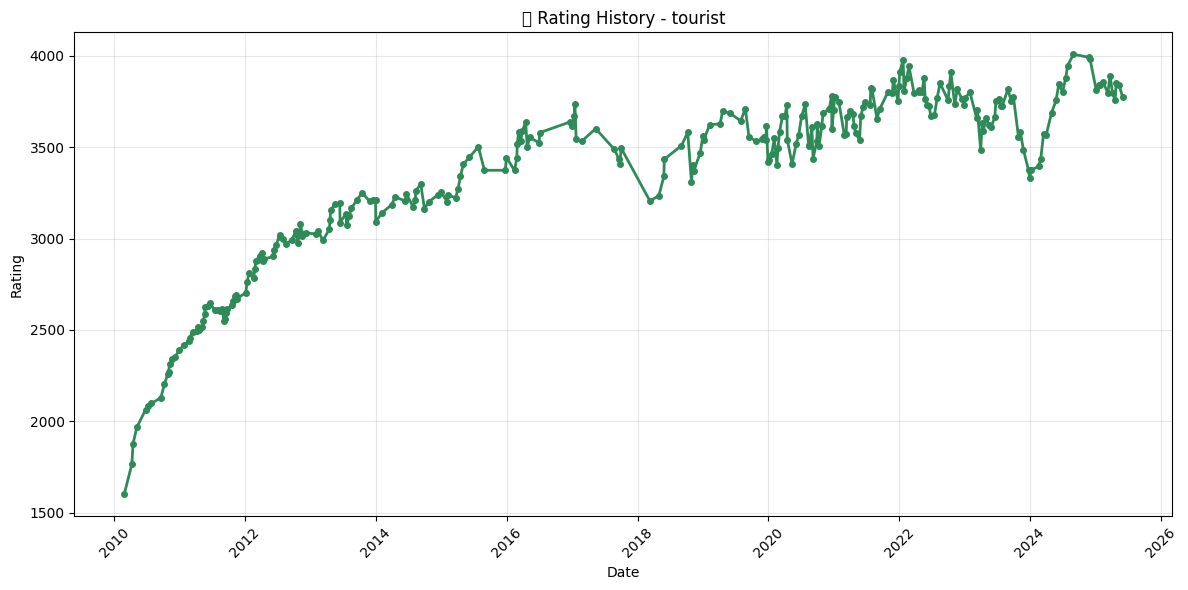

📌 Contests: 282 | Current: 3777 | Max: 4009


In [1]:
#📌 Codeforces Profile Analyzer
# Enter your handle and see your stats and charts!

import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Function to get user info
def get_user_info(handle):
    url = f'https://codeforces.com/api/user.info?handles={handle}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        user = data['result'][0]
        print(f"👤 Profile: {handle}")
        print(f"🏅 Rating: {user.get('rating', 'N/A')}")
        print(f"📈 Max Rating: {user.get('maxRating', 'N/A')}")
        print(f"🎖 Rank: {user.get('rank', 'N/A')}")
        print(f"💬 Contribution: {user.get('contribution', 'N/A')}")
    else:
        print('❌ Failed to fetch user info:', data.get('comment', 'Unknown error'))

# Function to fetch and plot verdicts
def fetch_and_plot_verdicts(handle, count=100):
    url = f'https://codeforces.com/api/user.status?handle={handle}&count={count}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        submissions = data['result']
        verdicts = {}
        for sub in submissions:
            verdict = sub.get('verdict', 'UNKNOWN')
            verdicts[verdict] = verdicts.get(verdict, 0) + 1

        print(f"\n📄 Total submissions: {len(submissions)}")
        print(f"✅ Accepted: {verdicts.get('OK', 0)}")

        # Bar chart
        plt.figure(figsize=(8, 4))
        plt.bar(verdicts.keys(), verdicts.values(), color='mediumslateblue')
        plt.title(f'Verdict Distribution - {handle}')
        plt.xlabel('Verdict')
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print('❌ Failed to fetch submissions:', data.get('comment', 'Unknown error'))

# Function to plot rating history
def plot_rating_history(handle):
    url = f'https://codeforces.com/api/user.rating?handle={handle}'
    response = requests.get(url)
    data = response.json()

    if data['status'] == 'OK':
        rating_history = data['result']
        if not rating_history:
            print("No contests found.")
            return

        ratings = [entry['newRating'] for entry in rating_history]
        times = [datetime.fromtimestamp(entry['ratingUpdateTimeSeconds']) for entry in rating_history]

        plt.figure(figsize=(12, 6))
        plt.plot(times, ratings, marker='o', linewidth=2, markersize=4, color='seagreen')
        plt.title(f'📊 Rating History - {handle}')
        plt.xlabel('Date')
        plt.ylabel('Rating')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"📌 Contests: {len(ratings)} | Current: {ratings[-1]} | Max: {max(ratings)}")
    else:
        print('❌ Failed to fetch rating history:', data.get('comment', 'Unknown error'))

# --- 🔽 Input Handle and Run ---
handle = input("Enter your Codeforces handle: ").strip()

get_user_info(handle)
fetch_and_plot_verdicts(handle)
plot_rating_history(handle)